In [ ]:
!pip install torchinfo
!pip install facenet_pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os
import cv2
import matplotlib.pyplot as plt
from IPython.display import FileLink
from sklearn.model_selection import train_test_split
from PIL import Image
from torchvision import models
from torchinfo import summary
from facenet_pytorch import InceptionResnetV1
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from torchvision.models import resnet50, ResNet50_Weights
from tqdm import tqdm

In [ ]:
!pip install kaggle
!kaggle datasets download -d noamsegal/affectnet-training-data

Dataset URL: https://www.kaggle.com/datasets/noamsegal/affectnet-training-data
License(s): Attribution-NonCommercial-ShareAlike 3.0 IGO (CC BY-NC-SA 3.0 IGO)
affectnet-training-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
%ls

 affectnet-training-data.zip  'archive (1)'/   sample_data/


In [ ]:
import zipfile
os.makedirs("archive (1)", exist_ok=True)


with zipfile.ZipFile("affectnet-training-data.zip", "r") as zip_ref:
    zip_ref.extractall("archive (1)")


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
df = pd.read_csv("archive (1)/labels.csv",index_col = None)
df.head()

# def jadiSatu(x):
#     if x == 'contempt':
#         return 'disgust'
#     return x
# df['label'] = [jadiSatu(x) for x in df['label']]

df = df[df['label'] != 'disgust']
df = df[df['label'] != 'contempt']

In [ ]:
df

,Unnamed: 0,pth,label,relFCs
0,0,anger/image0000006.jpg,surprise,0.873142
1,1,anger/image0000060.jpg,anger,0.852311
2,2,anger/image0000061.jpg,anger,0.800957
4,4,anger/image0000106.jpg,anger,0.849108
5,5,anger/image0000132.jpg,anger,0.819448
...,...,...,...,...
28169,28169,surprise/image0034957.jpg,surprise,0.872566
28170,28170,surprise/image0034960.jpg,surprise,0.825263
28171,28171,surprise/image0034961.jpg,surprise,0.738646
28172,28172,surprise/image0034966.jpg,surprise,0.774524


In [ ]:
def show(img_path, label, converter):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(converter[label])
    plt.show()

In [ ]:
emotion_classes = {
    label: idx for idx, label in enumerate(df['label'].unique())
}

print(emotion_classes)

{'surprise': 0, 'anger': 1, 'fear': 2, 'sad': 3, 'neutral': 4, 'happy': 5}


In [ ]:
img_paths = []
emotion_las = []

for index, row in df.iterrows():
    img_paths.append(os.path.join('archive (1)/', row["pth"]))
    emotion_las.append(row["label"])

emotion_labels = [emotion_classes[i] for i in emotion_las]


In [ ]:
reverse_emotion_classes

{0: 'surprise', 1: 'anger', 2: 'fear', 3: 'sad', 4: 'neutral', 5: 'happy'}

In [ ]:
reverse_emotion_classes = {v: k for k, v in emotion_classes.items()}


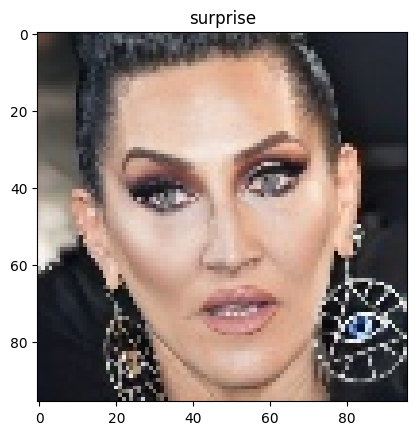

In [ ]:
show(img_paths[0], emotion_labels[0], reverse_emotion_classes)

In [ ]:
df['label'].value_counts()

,count
label,
surprise,4616
happy,4336
anger,3608
fear,3043
sad,2995
neutral,2861


In [ ]:

# conver
ndt = {'file_link': [],
       'emotion': []}
converter = {'Neutral': 'neutral',
            'Happiness': 'happy',
            'Anger': 'anger',
            'Surprise': 'surprise',
            'Fear': 'fear',
            'Sadness': 'sad'}

emotion_classes = {
    label: idx for idx, label in enumerate(converter.keys())
}
print(emotion_classes)
reverse_emotion_classes = {v: k for k, v in emotion_classes.items()}

for exp in ['Neutral', 'Happiness', 'Anger', 'Surprise', 'Fear', 'Sadness']:
    img_list = os.listdir(f'archive (1)/{converter[exp]}')
    for img in img_list:
        ndt['file_link'].append(f'archive (1)/{converter[exp]}/{img}')
        ndt['emotion'].append(emotion_classes[exp])

ndf = pd.DataFrame(ndt)
ndf

{'Neutral': 0, 'Happiness': 1, 'Anger': 2, 'Surprise': 3, 'Fear': 4, 'Sadness': 5}


,file_link,emotion
0,archive (1)/neutral/ffhq_5110.png,0
1,archive (1)/neutral/ffhq_2994.png,0
2,archive (1)/neutral/ffhq_2115.png,0
3,archive (1)/neutral/ffhq_5295.png,0
4,archive (1)/neutral/ffhq_2200.png,0
...,...,...
23689,archive (1)/sad/image0018627.jpg,5
23690,archive (1)/sad/image0028942.jpg,5
23691,archive (1)/sad/image0021649.jpg,5
23692,archive (1)/sad/image0030066.jpg,5


In [ ]:
ndf['emotion'].value_counts()

,count
emotion,
0,5126
1,5044
3,4039
2,3218
4,3176
5,3091


In [ ]:
# ndf.groupby('emotion')
minClassSize = min(ndf['emotion'].value_counts())
ndf = ndf.groupby(['emotion'])
ndf = ndf.sample(n = minClassSize, random_state=42)

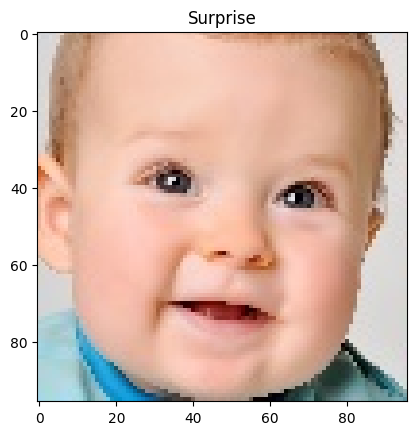

In [ ]:
show(ndf['file_link'].values.tolist()[10000], ndf['emotion'].values.tolist()[10000], reverse_emotion_classes)

In [ ]:
seed = 69
val_size = 0.3
is_shuffle = True
# X_train_emotion, X_val_emotion, y_train_emotion, y_val_emotion = train_test_split(
#     ndf['file_link'].values.tolist(), ndf['emotion'].values.tolist(),
#     test_size = val_size,
#     random_state = seed,
#     shuffle = is_shuffle
# )
# img_paths.extend(ndf['file_link'].values.tolist())
# emotion_labels.extend(ndf['emotion'].values.tolist())

# img_paths = []
# emotion_las = []
X_train_emotion, X_val_emotion, y_train_emotion, y_val_emotion = train_test_split(
    ndf['file_link'].values.tolist(),
    ndf['emotion'].values.tolist(),
    test_size = val_size,
    random_state = seed,
    shuffle = is_shuffle
)


In [ ]:
print(len(X_train_emotion))
print(len(y_val_emotion))

12982
5564


In [ ]:
import cv2
from PIL import Image
import torch
from torchvision import transforms
import numpy as np

# Initialize mean and std variables
mean = torch.zeros(3)  # For RGB channels
n_samples = 0

transform = transforms.ToTensor()

# First loop: Calculate Mean
for images_path in X_train_emotion:
    img = Image.open(images_path).convert('RGB')  # Open image and convert to RGB

    # Apply transformation to convert to tensor
    img_tensor = transform(img)  # Shape: [C, H, W]

    # Update mean for each channel
    mean += img_tensor.mean(dim=(1, 2))  # Mean across height and width (dim 1 and 2)
    n_samples += 1

# Compute overall mean
mean /= n_samples
print(f"Mean: {mean}")

# Second loop: Calculate Std (Variance first, then sqrt)
sum_squared_diff = torch.zeros(3)  # For variance calculation

for images_path in X_train_emotion:
    img = Image.open(images_path).convert('RGB')  # Open image and convert to RGB

    # Apply transformation to convert to tensor
    img_tensor = transform(img)  # Shape: [C, H, W]

    # Compute squared differences from the mean for variance
    sum_squared_diff += ((img_tensor - mean[:, None, None]) ** 2).mean(dim=(1, 2))

# Compute variance and standard deviation
variance = sum_squared_diff / n_samples
std = torch.sqrt(variance)

print(f"Std: {std}")


Mean: tensor([0.5346, 0.4291, 0.3799])
Std: tensor([0.2935, 0.2665, 0.2623])


In [ ]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
#     transforms.ColorJitter(brightness=(0.1,0.6), contrast=1,saturation=0, hue=0.4),
    transforms.Resize((160,160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5355, 0.4289, 0.3795], [0.2933, 0.2659, 0.2618]),
    transforms.RandomAffine(
        degrees=0,
        translate=(0.01, 0.12),
        shear=(0.01, 0.03),
    ),
    transforms.RandomErasing(p=0.7,
                             scale=(0.01, 0.3),
                             ratio=(1.0, 1.0),
                             value=0,
                             inplace =True)
])

val_transform = transforms.Compose([
    transforms.Resize((160,160)),
    transforms.ToTensor(),
    transforms.Normalize([0.5355, 0.4289, 0.3795], [0.2933, 0.2659, 0.2618]),
])

In [ ]:
class EmotionDataset(Dataset):
    def __init__(
        self, X, y,
        transform
    ):
        self.transform = transform
        self.img_paths = X
        self.labels = y

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self,idx):
        img_path = self.img_paths[idx]
#         img = Image.open(img_path)
        img = cv2.imread(img_path)
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

        clahe = cv2.createCLAHE(clipLimit=5,tileGridSize=(8,8))

        lab[...,0] = clahe.apply(lab[...,0])
#         lab[...,1] = clahe.apply(lab[...,1])
#         lab[...,2] = clahe.apply(lab[...,2])

        img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        img = Image.fromarray(img)

        img = self.transform(img)

        label = self.labels[idx]
        return img_path,img,label

In [ ]:
emotion_train_dataset = EmotionDataset(
    X_train_emotion, y_train_emotion,
    transform = train_transform
)

emotion_val_dataset = EmotionDataset(
    X_val_emotion, y_val_emotion,
    transform = val_transform
)

In [ ]:
train_batch_size = 64
val_batch_size = 256

emotion_train_loader = DataLoader(
    emotion_train_dataset,
    batch_size = train_batch_size,
    shuffle = True
)

emotion_val_loader = DataLoader(
    emotion_val_dataset,
    batch_size = val_batch_size,
    shuffle = False
)


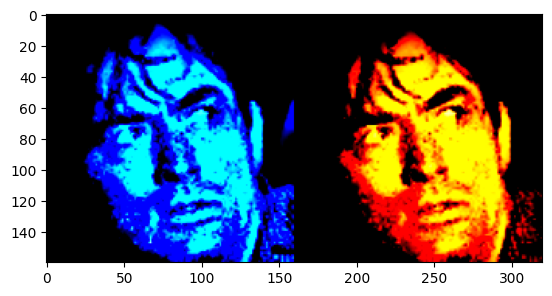

In [ ]:
from PIL import Image
from matplotlib import cm

link = "archive (1)/fear/image0000701.jpg"

equ = Image.open(link)

# Reading the image from the present directory
image = cv2.imread(link)
# image = cv2.resize(image, (500, 600))
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

clahe = cv2.createCLAHE(clipLimit=5,tileGridSize=(8,8))

lab[...,0] = clahe.apply(lab[...,0])
# lab[...,1] = clahe.apply(lab[...,1])
# lab[...,2] = clahe.apply(lab[...,2])

img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
img = Image.fromarray(img)

# Convert the PyTorch tensor to a NumPy array
img = val_transform(img)
equ = val_transform(equ)

# Rearrange the dimensions so that the channel dimension is last
img = np.transpose(img, (1, 2, 0))
equ = np.transpose(equ, (1, 2, 0))

img = np.hstack((img, equ))
plt.imshow(img)

In [ ]:
from sklearn import metrics
def evaluation(model,val_loader,mcriterion):
    model.eval()
    mpreds, mlabels = [], []
    mval_loss = 0.0
    with torch.no_grad():
        for links, images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            mloss = mcriterion(outputs,labels)
            mval_loss += mloss.item()

            _, predicted = torch.max(outputs.data,1)
            mpreds.extend(predicted.tolist())
            mlabels.extend(labels.tolist())

    maccuracy = 100 * accuracy_score(mpreds, mlabels)
    confusion_matrix = metrics.confusion_matrix(mlabels, mpreds)

    n_classes = confusion_matrix.shape[0]

    # Generate display labels based on the number of classes
    display_labels = list(range(n_classes))

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = display_labels)
    cm_display.plot()
    plt.show()
    mval_loss = mval_loss / len(val_loader)
    return mval_loss, maccuracy

In [ ]:
def save(filename, model):
    filename = "./" + filename
    torch.save(model.state_dict(), filename)
    print("Saved model as", filename)


In [ ]:
criterion = nn.CrossEntropyLoss()
# emotion_model = resnet50(weights=ResNet50_Weights.DEFAULT).to(device)
# num_features = emotion_model.fc.in_features
# emotion_model.fc = nn.Linear(num_features, len(emotion_classes)).to(device)

# emotion_model.fc = nn.Sequential(
#           nn.ReLU(),
#           nn.Linear(num_features, len(emotion_classes))
#         ).to(device)
# emotion_model.load_state_dict(torch.load("/kaggle/input/weights/emotion_weight (6).pt"))
emotion_model = InceptionResnetV1(pretrained='vggface2', device=device, classify= True, num_classes=len(emotion_classes))
optimizer = torch.optim.Adam(emotion_model.parameters(),
                             lr=1e-4)
emotion_model.load_state_dict(torch.load("emotion_weight.pt"))

<All keys matched successfully>

In [ ]:
# optimizer = torch.optim.SGD(emotion_model.parameters(), lr=1e-4, momentum=0.9)

In [ ]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
max_epoch = 20
best_accuracy = 10

Epoch 1: 

100%|██████████| 203/203 [01:48<00:00,  1.87it/s]


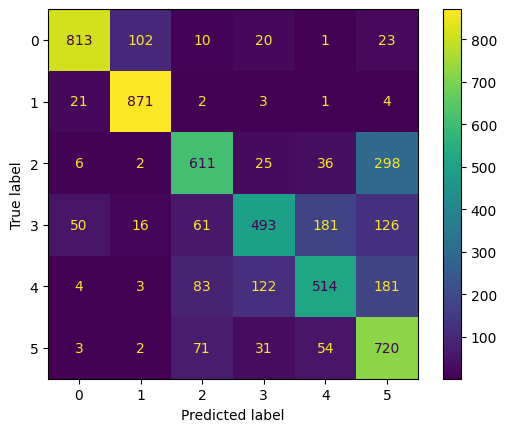

Epoch [1/20], Loss: 0.8398, Accuracy: 66.99%, Val Loss: 0.7101, Val Accuracy: 72.29%
saving at epoch 1
Saved model as ./emotion_weight.pt
Epoch 2: 

100%|██████████| 203/203 [01:48<00:00,  1.86it/s]


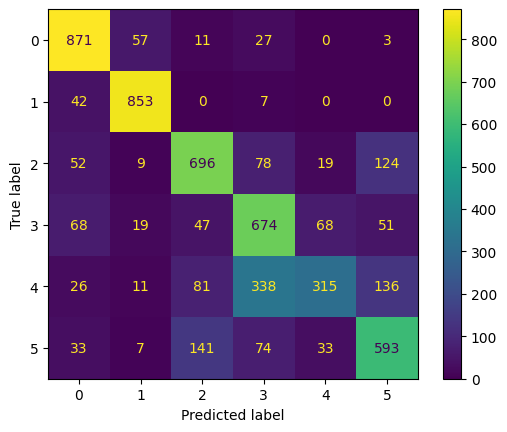

Epoch [2/20], Loss: 0.7761, Accuracy: 69.37%, Val Loss: 0.7386, Val Accuracy: 71.93%
Epoch 3: 

100%|██████████| 203/203 [01:47<00:00,  1.89it/s]


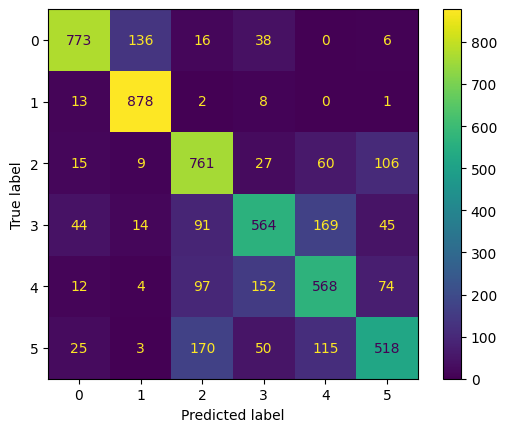

Epoch [3/20], Loss: 0.7396, Accuracy: 70.83%, Val Loss: 0.7287, Val Accuracy: 73.01%
saving at epoch 3
Saved model as ./emotion_weight.pt
Epoch 4: 

100%|██████████| 203/203 [01:48<00:00,  1.88it/s]


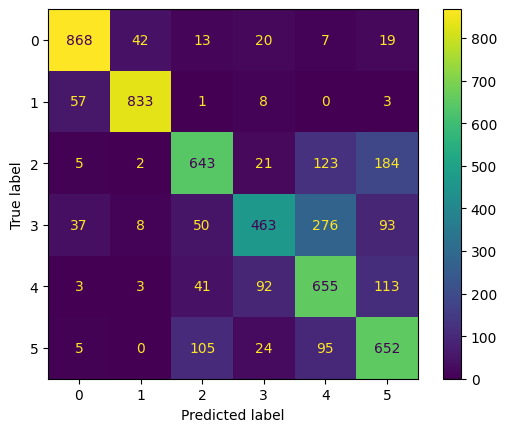

Epoch [4/20], Loss: 0.7234, Accuracy: 71.52%, Val Loss: 0.6763, Val Accuracy: 73.94%
saving at epoch 4
Saved model as ./emotion_weight.pt
Epoch 5: 

100%|██████████| 203/203 [01:50<00:00,  1.84it/s]


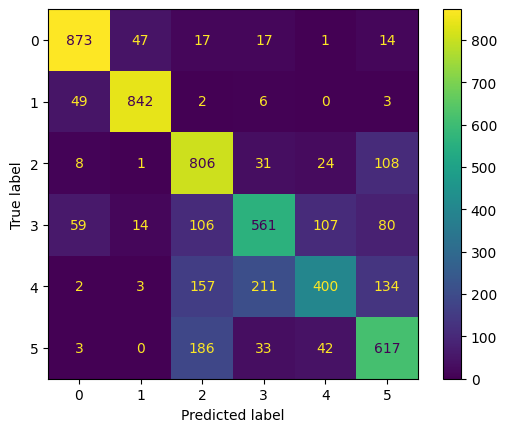

Epoch [5/20], Loss: 0.6796, Accuracy: 73.34%, Val Loss: 0.6695, Val Accuracy: 73.67%
Epoch 6: 

100%|██████████| 203/203 [01:48<00:00,  1.87it/s]


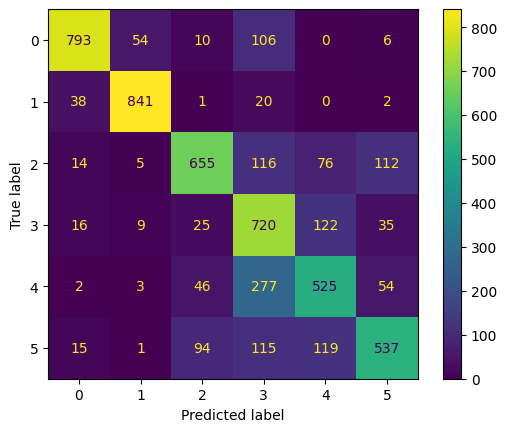

Epoch [6/20], Loss: 0.6622, Accuracy: 74.34%, Val Loss: 0.7198, Val Accuracy: 73.17%
Epoch 7: 

100%|██████████| 203/203 [01:49<00:00,  1.86it/s]


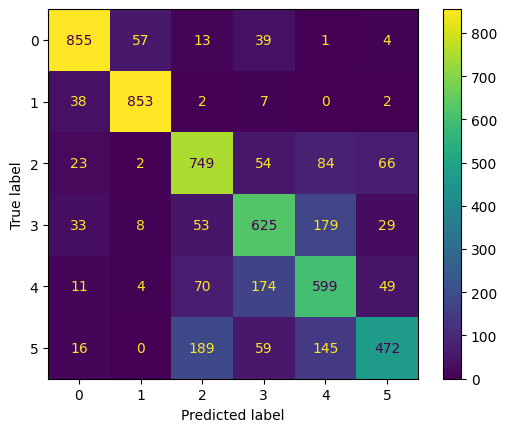

Epoch [7/20], Loss: 0.6509, Accuracy: 74.27%, Val Loss: 0.6669, Val Accuracy: 74.64%
saving at epoch 7
Saved model as ./emotion_weight.pt
Epoch 8: 

100%|██████████| 203/203 [01:48<00:00,  1.88it/s]


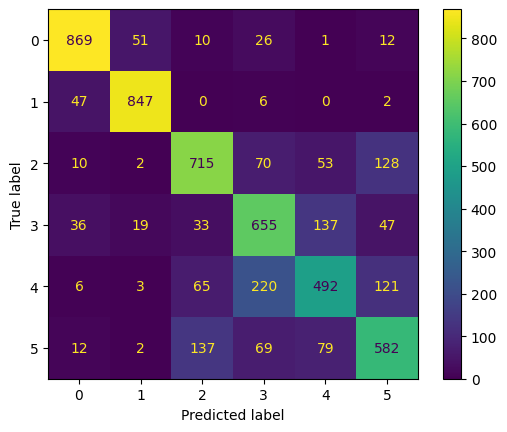

Epoch [8/20], Loss: 0.6261, Accuracy: 75.14%, Val Loss: 0.6500, Val Accuracy: 74.77%
saving at epoch 8
Saved model as ./emotion_weight.pt
Epoch 9: 

100%|██████████| 203/203 [01:49<00:00,  1.86it/s]


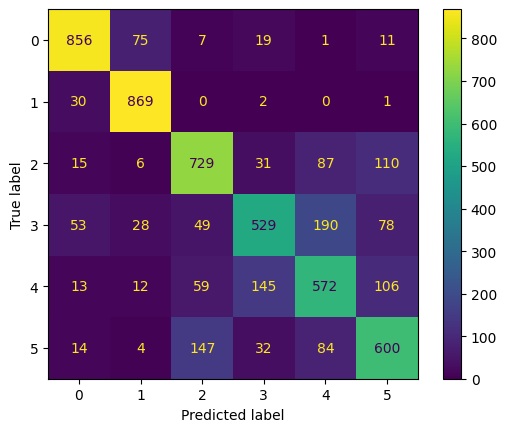

Epoch [9/20], Loss: 0.6186, Accuracy: 75.53%, Val Loss: 0.6857, Val Accuracy: 74.68%
Epoch 10: 

100%|██████████| 203/203 [01:47<00:00,  1.88it/s]


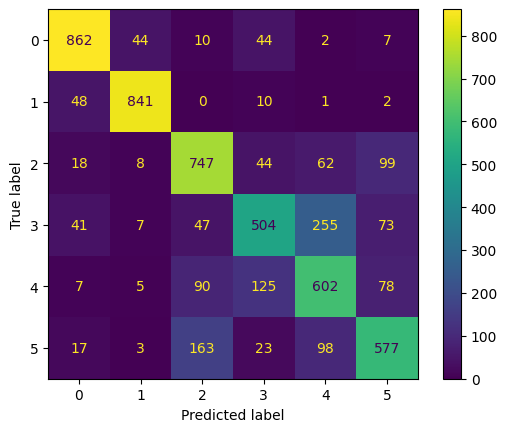

Epoch [10/20], Loss: 0.5986, Accuracy: 76.96%, Val Loss: 0.6960, Val Accuracy: 74.28%
Epoch 11: 

100%|██████████| 203/203 [01:47<00:00,  1.88it/s]


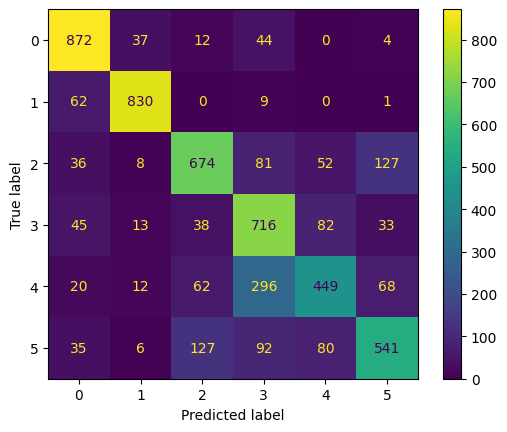

Epoch [11/20], Loss: 0.5810, Accuracy: 77.59%, Val Loss: 0.7460, Val Accuracy: 73.36%
Epoch 12: 

100%|██████████| 203/203 [01:47<00:00,  1.88it/s]


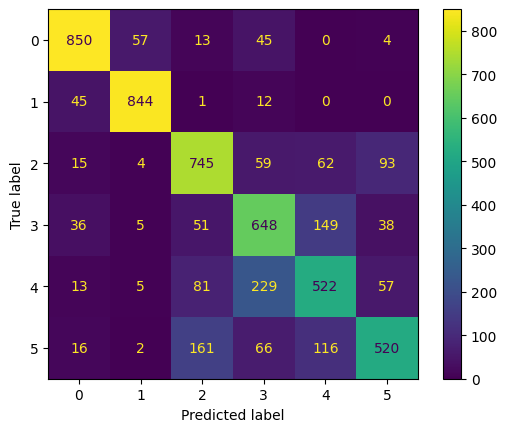

Epoch [12/20], Loss: 0.5581, Accuracy: 78.22%, Val Loss: 0.7097, Val Accuracy: 74.21%
Epoch 13: 

100%|██████████| 203/203 [01:48<00:00,  1.87it/s]


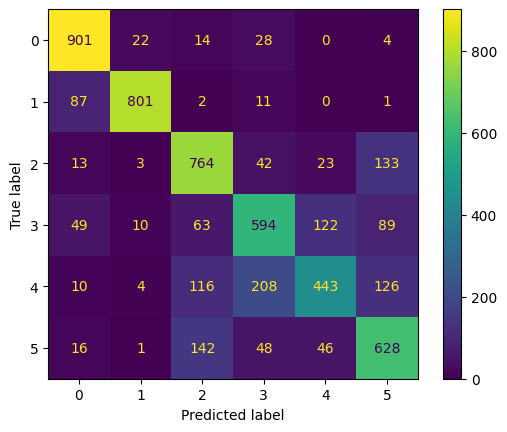

Epoch [13/20], Loss: 0.5495, Accuracy: 78.28%, Val Loss: 0.7287, Val Accuracy: 74.25%
Epoch 14: 

100%|██████████| 203/203 [01:48<00:00,  1.87it/s]


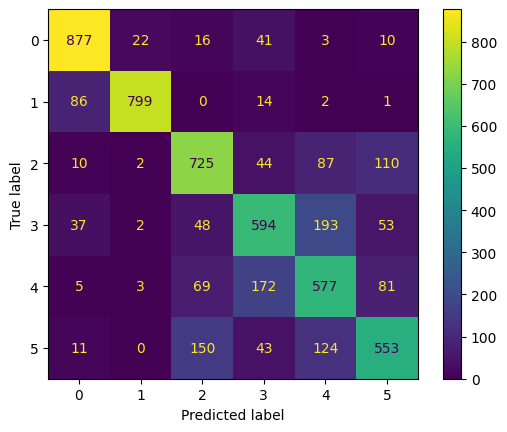

Epoch [14/20], Loss: 0.5414, Accuracy: 79.18%, Val Loss: 0.7258, Val Accuracy: 74.14%
Epoch 15: 

100%|██████████| 203/203 [01:48<00:00,  1.88it/s]


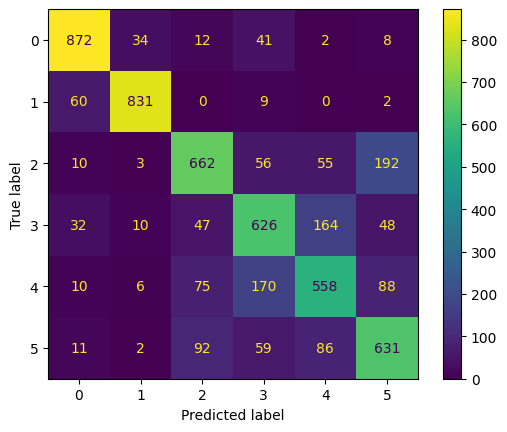

Epoch [15/20], Loss: 0.5208, Accuracy: 79.96%, Val Loss: 0.6971, Val Accuracy: 75.13%
saving at epoch 15
Saved model as ./emotion_weight.pt
Epoch 16: 

100%|██████████| 203/203 [01:49<00:00,  1.85it/s]


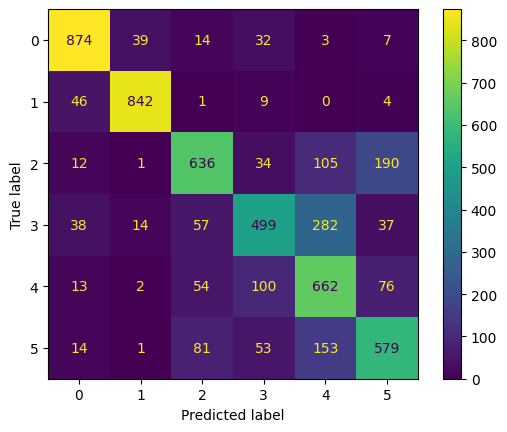

Epoch [16/20], Loss: 0.4979, Accuracy: 81.07%, Val Loss: 0.7458, Val Accuracy: 73.54%
Epoch 17: 

100%|██████████| 203/203 [01:48<00:00,  1.88it/s]


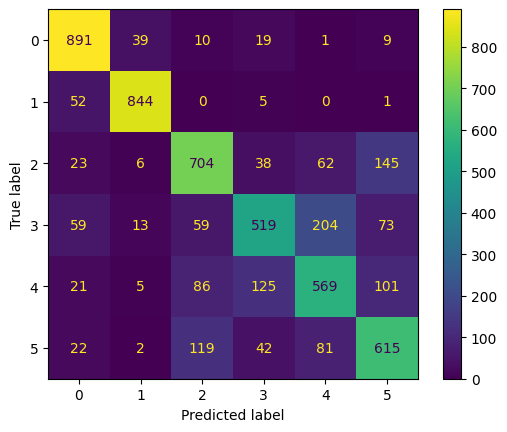

Epoch [17/20], Loss: 0.4885, Accuracy: 81.30%, Val Loss: 0.7552, Val Accuracy: 74.44%
Epoch 18: 

100%|██████████| 203/203 [01:47<00:00,  1.88it/s]


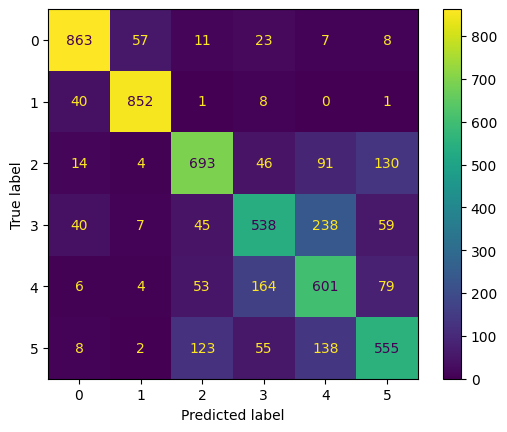

Epoch [18/20], Loss: 0.4773, Accuracy: 81.67%, Val Loss: 0.7692, Val Accuracy: 73.72%
Epoch 19: 

100%|██████████| 203/203 [01:47<00:00,  1.88it/s]


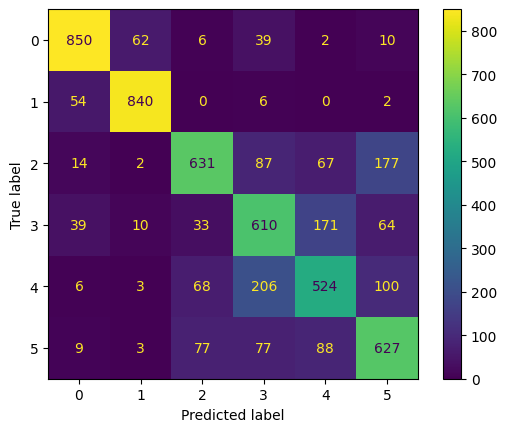

Epoch [19/20], Loss: 0.4666, Accuracy: 82.20%, Val Loss: 0.7627, Val Accuracy: 73.36%
Epoch 20: 

100%|██████████| 203/203 [01:48<00:00,  1.88it/s]


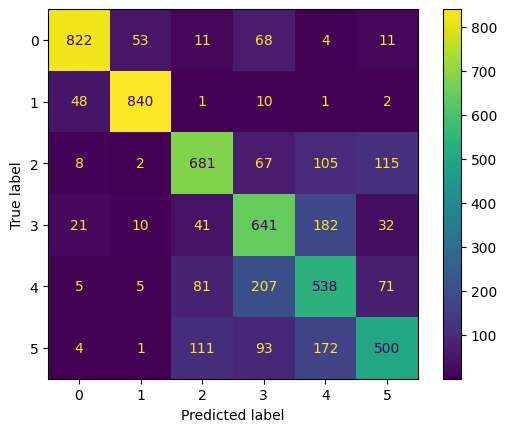

Epoch [20/20], Loss: 0.4578, Accuracy: 82.52%, Val Loss: 0.8406, Val Accuracy: 72.29%


In [ ]:
for epoch in range(max_epoch):
    emotion_model.train()
    mpred, mlabel = [], []
    running_loss = 0.0

    print(f"Epoch {epoch + 1}: ", end='')
    for _ in tqdm(range(len(emotion_train_loader))):
        links, inputs, labels = next(iter(emotion_train_loader))
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = emotion_model(inputs)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        running_loss += loss.item()

        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        mpred.extend(predicted.tolist())
        mlabel.extend(labels.tolist())

    epoch_accuracy = 100 * accuracy_score(mpred, mlabel)
    epoch_loss = running_loss / (len(emotion_train_loader))

    val_loss, val_accuracy = evaluation(emotion_model, emotion_val_loader, criterion)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%")

    if val_accuracy > best_accuracy:
        print("saving at epoch", epoch+1)
        best_accuracy = val_accuracy
        save("emotion_weight.pt", emotion_model)

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)


In [ ]:
emotion_model.eval()
mpred, mlabel, false_im = [], [], []
with torch.no_grad():
    for links, images, labels in emotion_val_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = emotion_model(images)

        _, predicted = torch.max(outputs.data,1)
        mpred.extend(predicted.tolist())
        mlabel.extend(labels.tolist())
        for link, predict, label in zip(links, predicted.tolist(), labels.tolist()):
            if predict != label:
                false_im.append([link, reverse_emotion_classes[predict], reverse_emotion_classes[label]])

accuracy = 100 * accuracy_score(mpred, mlabel)
print(accuracy)

75.12580877066858


In [ ]:
# emotion_model.eval()
# face_image

# predictions = emotion_model(face_image)
# probabilities = F.softmax(predictions, dim=1)  # Convert logits to probabilities
# ind = torch.argmax(probabilities).item()  # Get index of the highest probability
# emotion_label = class_names[ind]
# print(probabilities)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5355, 0.4289, 0.3795], [0.2933, 0.2659, 0.2618])
])

def preprocess_single_image(img_path, transform):
    """
    Preprocesses a single image for model inference.

    Args:
        img_path: Path to the image file.
        transform: The preprocessing transform used during training/validation.

    Returns:
        A tensor ready for model input.
    """
    img = cv2.imread(img_path)
    grayscale_data = cv2.GaussianBlur(img, (11, 11), 0)
    lab = cv2.cvtColor(grayscale_data, cv2.COLOR_BGR2LAB)

    clahe = cv2.createCLAHE(clipLimit=5,tileGridSize=(8,8))

    lab[...,0] = clahe.apply(lab[...,0])
#         lab[...,1] = clahe.apply(lab[...,1])
#         lab[...,2] = clahe.apply(lab[...,2])

    img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # Apply transformations
    img = Image.fromarray(img)  # Convert to PIL Image
    img_tensor = transform(img).unsqueeze(0)  # Add batch dimension

    # # Load the image using OpenCV
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display consistency

    return img_tensor, np.array(img)

def predict_and_display(model, img_path, transform, class_names):
    """
    Predicts the class of a single image and displays the image with the prediction.

    Args:
        model: The trained model.
        img_path: Path to the image file.
        transform: The preprocessing transform used during training/validation.
        class_names: List of class names corresponding to model outputs.

    Returns:
        None
    """
    model.eval()  # Set model to evaluation mode
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Preprocess the image
    img_tensor, original_img = preprocess_single_image(img_path, transform)
    img_tensor = img_tensor.to(device)

    # Make prediction
    with torch.no_grad():
        output = model(img_tensor)
        _, predicted = torch.max(output, 1)  # Get the predicted class index
        predicted_class = class_names[predicted.item()]  # Get class name

    # Display the image with the prediction
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_class}", fontsize=14)
    plt.axis('off')
    plt.show()

class_names = ['Neutral', 'Happiness', 'Anger', 'Surprise', 'Fear', 'Sadness', 'Disgust']
img_path = "archive (1)/happy/ffhq_14.png"
predict_and_display(emotion_model, img_path, transform, class_names)